<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[ADABoost](#ada)**
2. **[Gradient Boosting](#gb)**
3. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

#### Load the csv file

In [2]:
df=pd.read_csv('emp_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [3]:
df.shape

(1580, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
Age                        1580 non-null int64
Attrition                  1580 non-null object
BusinessTravel             1580 non-null object
Department                 1580 non-null object
DistanceFromHome           1580 non-null int64
EducationField             1580 non-null object
EnvironmentSatisfaction    1580 non-null int64
Gender                     1580 non-null object
JobInvolvement             1580 non-null int64
JobLevel                   1580 non-null int64
JobRole                    1580 non-null object
JobSatisfaction            1580 non-null int64
MonthlyIncome              1580 non-null int64
NumCompaniesWorked         1580 non-null int64
OverTime                   1580 non-null object
PercentSalaryHike          1580 non-null int64
PerformanceRating          1580 non-null int64
YearsAtCompany             1580 non-null int64
dtypes: int64(11), object(7)
memory usag

In [5]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

In [6]:
df['Attrition'].value_counts()

No     880
Yes    700
Name: Attrition, dtype: int64

**Data Preparation**

**Remove the outlier using IQR method, if present.**

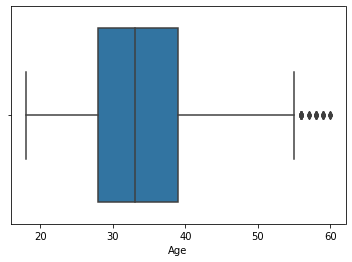

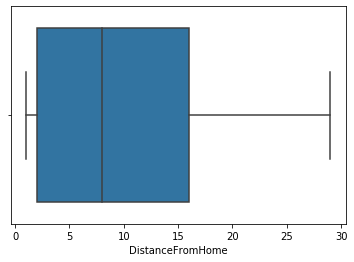

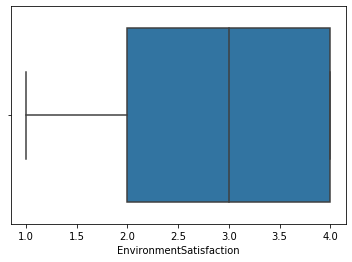

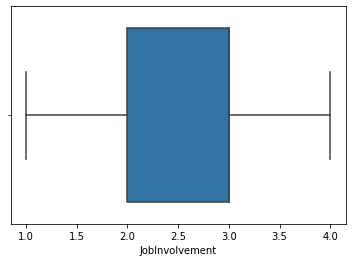

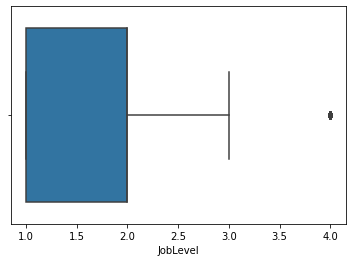

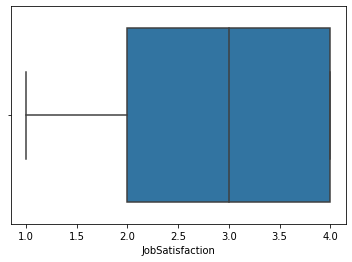

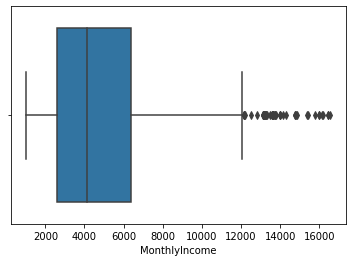

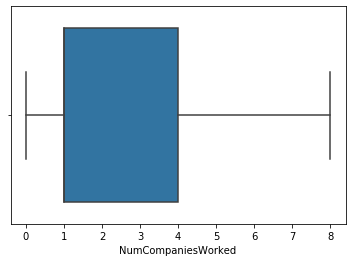

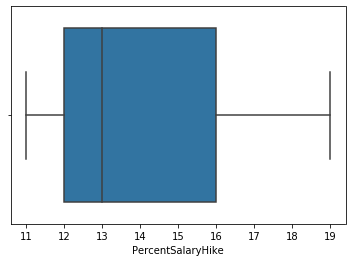

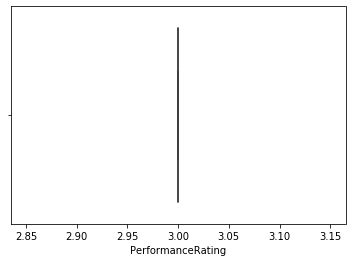

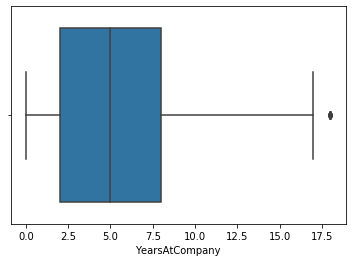

In [7]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [8]:
# yes there are outliers present in the data 
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)

df=df[~((df<ll)|(df>ul))]
df=df.dropna()
df.shape

(1487, 18)

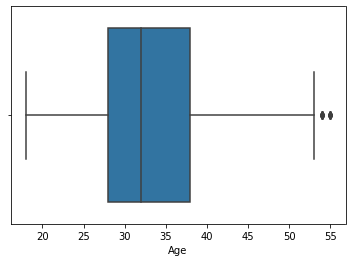

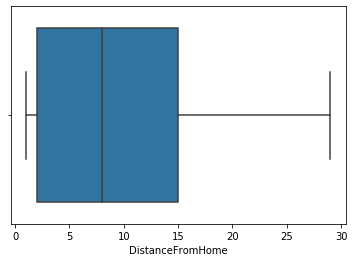

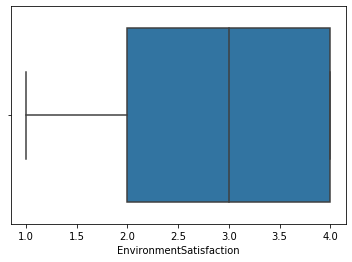

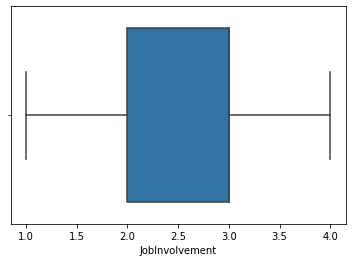

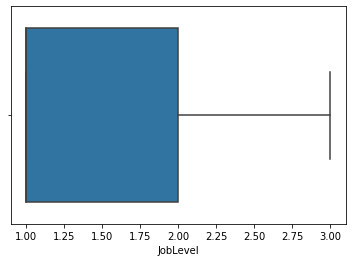

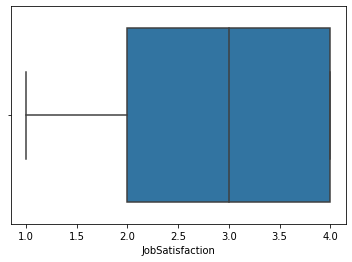

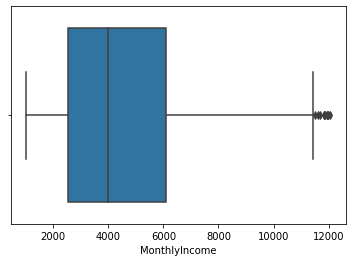

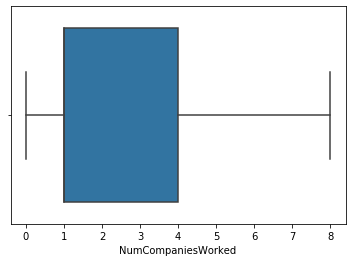

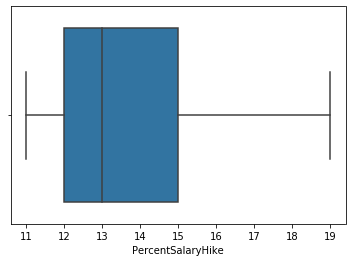

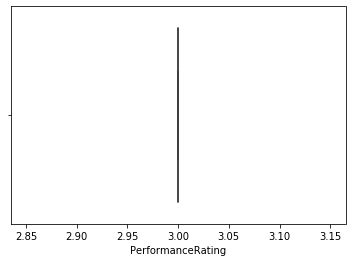

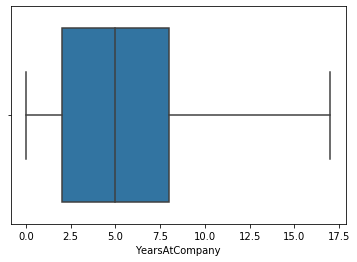

In [9]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [10]:
#performance rating has the same values so dropping the column 
df=df.drop('PerformanceRating',axis=1)

**Encode the categorical variables.**

In [11]:
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})
df['Attrition'].value_counts()

0    815
1    672
Name: Attrition, dtype: int64

In [12]:
cat_cols=df.select_dtypes('object')
pd.get_dummies(cat_cols,drop_first=True)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
1575,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1577,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1578,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
bins=[18,30,40,50,60]
df['Age']=pd.cut(df['Age'],bins=bins,labels=['A','B','C','D'])
df['Age'].value_counts()

B    643
A    549
C    228
D     47
Name: Age, dtype: int64

In [14]:
df['Age'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D'], ordered=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
df.groupby('Age').sum()['MonthlyIncome'].nlargest(1)

Age
B    3319429.0
Name: MonthlyIncome, dtype: float64

In [16]:
df.groupby('Age').sum()['MonthlyIncome'].sort_values(ascending=False).head(1)

Age
B    3319429.0
Name: MonthlyIncome, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
pd.get_dummies(df['Age'],drop_first=True,prefix='Age')

,Age_B,Age_C,Age_D
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
1574,0,0,0
1575,0,0,0
1577,0,0,0
1578,1,0,0


<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x_cat=df.select_dtypes('object')
x1=pd.get_dummies(x_cat,drop_first=True)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,confusion_matrix

x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.7,random_state=10)

ada=AdaBoostClassifier(n_estimators=40)
ada.fit(x_train,y_train)

y_pred=ada.predict(x_test)
y_prob=ada.predict_proba(x_test)[:,1]

print("accuracy score : \n ",accuracy_score(y_test,y_pred))

accuracy score : 
  0.7114093959731543


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.7,random_state=10)

ada=AdaBoostClassifier(n_estimators=40)
ada.fit(x_train,y_train)

y_pred=ada.predict(x_test)
y_prob=ada.predict_proba(x_test)[:,1]

print("Classification report : \n ",classification_report(y_test,y_pred))

Classification report : 
                precision    recall  f1-score   support

           0       0.81      0.82      0.81       245
           1       0.77      0.76      0.77       202

    accuracy                           0.79       447
   macro avg       0.79      0.79      0.79       447
weighted avg       0.79      0.79      0.79       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
y_pred=ada.predict(x_test)
y_prob=ada.predict_proba(x_test)[:,1]

print("area under the roc_curve is : ",roc_auc_score(y_test,y_prob))

area under the roc_curve is :  0.8607900585976965


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix is : ' )
print(cm)

confusion matrix is : 
[[200  45]
 [ 48 154]]


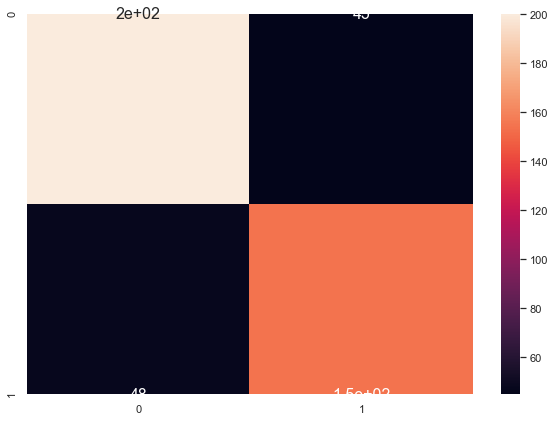

In [60]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[200,  45],
       [ 48, 154]], dtype=int64)

In [24]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
accuracy=(TP+TN)/(TP+FP+TN+FN)
misclassified_rate=(FN+FP)/(TP+TN+FN+FP)

print("the sensitivity of the model is : ",sensitivity)
print("the specificity of the model is : ",specificity)
print("the % accuracy of the model is : ",accuracy*100)
print("the % misclassified rate of the model is : ",misclassified_rate*100)

the sensitivity of the model is :  0.7623762376237624
the specificity of the model is :  0.8163265306122449
the % accuracy of the model is :  79.19463087248322
the % misclassified rate of the model is :  20.80536912751678


In [25]:
# sensitivity and specificity gives the proportion of true positives and proportion of true negatives. As both the values are 
# greater than 0.75, our model is good.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

       n_estimators = [100, 120, 150, 200, 250, 300, 350],
       learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015]         

In [26]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
ada=AdaBoostClassifier()
params={'n_estimators':[100, 120, 150, 200, 250, 300, 350],
       'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015]}

gsearch=GridSearchCV(ada,param_grid=params,cv=3,scoring='roc_auc',n_jobs=-1)
gsearch.fit(x1,y)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                         'n_estimators': [100, 120, 150, 200, 250, 300, 350]},
             scoring='roc_auc')

In [27]:
gsearch.best_params_

{'learning_rate': 0.15, 'n_estimators': 350}

In [28]:
print("the best learning rate is :", gsearch.best_params_['learning_rate'])
print("best hyperparameter for n_estimators is : ",gsearch.best_params_['n_estimators'])

the best learning rate is : 0.15
best hyperparameter for n_estimators is :  350


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)

x_train,x_test,y_train,y_test = train_test_split(x1,y,train_size=0.75,random_state=10)

abc=AdaBoostClassifier(**gsearch.best_params_)
cv_model=cross_val_score(abc,x_train,y_train,cv=10,scoring='roc_auc')
cv_model

array([0.84839744, 0.88010286, 0.78270653, 0.80167149, 0.89392478,
       0.84771242, 0.82647059, 0.85424837, 0.7996732 , 0.84281046])

In [30]:
print("the average ROC-AUC score is : ",np.mean(cv_model))

the average ROC-AUC score is :  0.837771812592208


<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)

x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.75,random_state=10)

gbc=GradientBoostingClassifier(n_estimators=100,max_depth=3)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [32]:
y_pred=gbc.predict(x_test)
y_prob=gbc.predict_proba(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.8951612903225806

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [34]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)

gb=GradientBoostingClassifier()
params={'n_estimators':[100, 120, 150, 200, 250, 300, 350],
       'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015],
       'max_depth':[2, 3, 4, 5, 6]}

gsearch=GridSearchCV(gb,param_grid=params,cv=3,scoring='roc_auc',n_jobs=-1)
gsearch.fit(x1,y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 120, 150, 200, 250, 300, 350]},
             scoring='roc_auc')

In [35]:
gsearch.best_params_

{'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 300}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)

x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.7,random_state=10)

#gradient boosting model
gb=GradientBoostingClassifier(max_depth=6,learning_rate=0.15,n_estimators=250)
gb.fit(x_train,y_train)

y_test_pred1=gb.predict(x_test)
print("the classification report  for Gradient boosting model is : \n ",classification_report(y_test,y_test_pred1))
print('\n')

#ADA boost model
ada=AdaBoostClassifier(learning_rate = 0.15, n_estimators = 350)
ada.fit(x_train,y_train)

y_test_pred2=ada.predict(x_test)
print("the classification report for ADA boost model is : \n ",classification_report(y_test,y_test_pred2))

the classification report  for Gradient boosting model is : 
                precision    recall  f1-score   support

           0       0.96      0.92      0.94       245
           1       0.91      0.96      0.93       202

    accuracy                           0.94       447
   macro avg       0.93      0.94      0.93       447
weighted avg       0.94      0.94      0.94       447



the classification report for ADA boost model is : 
                precision    recall  f1-score   support

           0       0.80      0.84      0.82       245
           1       0.80      0.75      0.77       202

    accuracy                           0.80       447
   macro avg       0.80      0.80      0.80       447
weighted avg       0.80      0.80      0.80       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
gb=GradientBoostingClassifier(max_depth=6,learning_rate=0.15,n_estimators=250)
gb.fit(x_train,y_train)

y_test_pred=gb.predict(x_test)
y_test_prob=gb.predict_proba(x_test)[:,1]

print("confusion_matrix is : \n ",confusion_matrix(y_test,y_test_pred))
print("\n")
print("area under the roc curve is : ",roc_auc_score(y_test,y_test_prob))

confusion_matrix is : 
  [[225  20]
 [  9 193]]


area under the roc curve is :  0.9784602950090928


In [48]:
cm=confusion_matrix(y_test,y_test_pred)

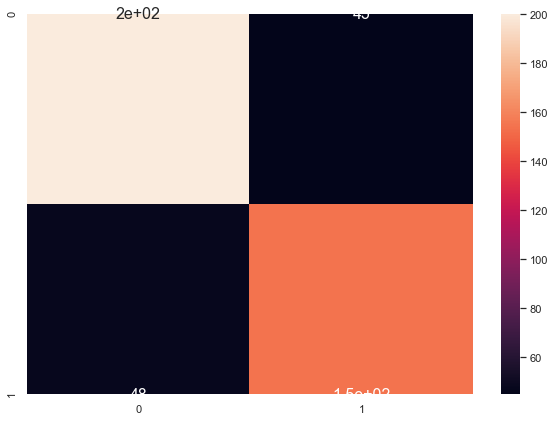

In [61]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)
x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.7,random_state=10)

from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.01,gamma=2)
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_test)
y_prob=xgb.predict_proba(x_test)[:,1]

print("classification_report \n : ",classification_report(y_test,y_pred))
print("\n")
print("ROC-AUC-SCORE : ",roc_auc_score(y_test,y_prob))


[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
classification_report 
 :                precision    recall  f1-score   support

           0       0.85      0.83      0.84       245
           1       0.80      0.82      0.81       202

    accuracy                           0.83       447
   macro avg       0.82      0.82      0.82       447
weighted avg       0.83      0.83      0.83       447



ROC-AUC-SCORE :  0.9036067892503536


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [42]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)

from xgboost import XGBClassifier
xgb=XGBClassifier()
params={'n_estimators' : [100, 120, 150],
    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
    'gamma' : [2, 3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5, 6]}

gsearch=GridSearchCV(xgb,param_grid=params,cv=3,scoring='roc_auc',n_jobs=-1)
gsearch.fit(x1,y)

[12:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [43]:
gsearch.best_params_

{'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)

x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.70,random_state=10)

from xgboost import XGBClassifier
xgb=XGBClassifier(**gsearch.best_params_)
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_test)
y_prob=xgb.predict_proba(x_test)[:,1]

print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))

[13:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix : 
  [[211  34]
 [ 20 182]]


In [65]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[211,  34],
       [ 20, 182]], dtype=int64)

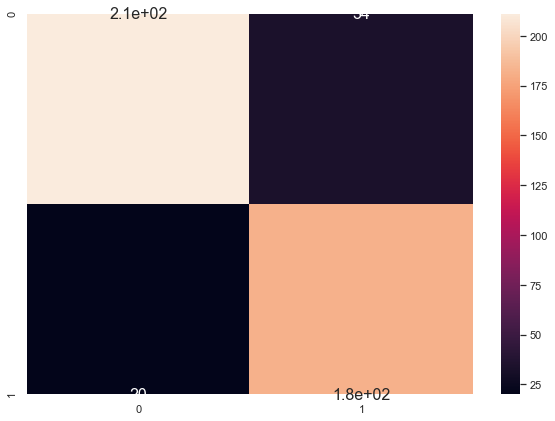

In [64]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
y_pred=xgb.predict(x_test)
y_prob=xgb.predict_proba(x_test)[:,1]

roc_auc_score(y_test,y_prob)

0.9470600121236614

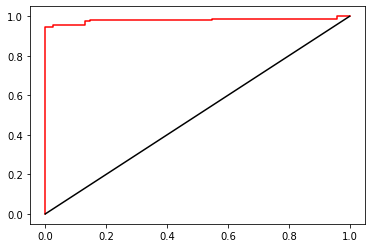

In [46]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'k')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)
x_train,x_test,y_train,y_test =train_test_split(x1,y,train_size=0.7,random_state=10)

base_learners=[('Decision Tree',DecisionTreeClassifier()),
              ('Random Forest',RandomForestClassifier())]

model=StackingClassifier(estimators=base_learners,final_estimator=AdaBoostClassifier())
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]

print("the Roc-Auc score is : ",roc_auc_score(y_test,y_prob))

the Roc-Auc score is :  0.977540917357042


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
y=df['Attrition']
x=df.drop('Attrition',axis=1)
x1=pd.get_dummies(x,drop_first=True)

x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.7,random_state=10)

base_learners=[('Decision Tree',DecisionTreeClassifier()),
              ('Random Forest',RandomForestClassifier())]

model=StackingClassifier(estimators=base_learners,final_estimator=GradientBoostingClassifier())
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]

print("ROC_AUC_SCORE : ",roc_auc_score(y_test,y_prob))

ROC_AUC_SCORE :  0.9722974338250152
